***Bienvenue***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import numpy as np
import random
import glob
import shutil

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Images')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Images'

In [122]:
for item in random.sample(glob.glob('/content/drive/MyDrive/Images/*'), 120):
   glob_item = glob.glob(item+'/*')
   valid_percent = int(len(glob_item) - len(glob_item) * 0.7) #take 30% of images
   train_percent = int(len(glob_item) - len(glob_item) * 0.4) #take 60% of images
   test_percent = len(glob_item) - valid_percent - train_percent #take 10% of images
   breed_name = item.split('/')[5][10 : ]

   receipt_folder = '/content/drive/MyDrive/validation/' + breed_name
   os.makedirs(receipt_folder)
   #  validation_filtered folder
   for j in random.sample(glob.glob(item+'/*'), valid_percent):
      shutil.copy(j, receipt_folder)

   receipt_folder = '/content/drive/MyDrive/train/' + breed_name
   os.makedirs(receipt_folder)
   #    train_filtered folder
   for k in random.sample(glob.glob(item+'/*'), train_percent):
      shutil.copy(k, receipt_folder)

   receipt_folder = '/content/drive/MyDrive/test/' +breed_name
   os.makedirs(receipt_folder)
   #    test_filtered folder
   for k in random.sample(glob.glob(item+'/*'), test_percent):
      shutil.copy(k, receipt_folder)



In [144]:
os.chdir('/content/drive/MyDrive/test')
os.getcwd()

'/content/drive/MyDrive/test'

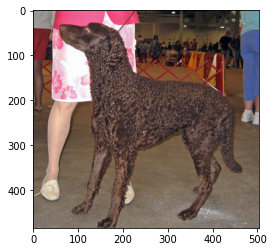

In [147]:
races = os.listdir()
races

for race in races:
  for item in glob.glob(race+'/*'):
    image = imread(item)
    type(image)
    image.shape
    imagesZ = image * 1./255
    imagesZ
    plt.imshow(imagesZ)

In [158]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [159]:
test_gen = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/test',
    target_size = (224,224),
    batch_size=20, 
    class_mode='categorical', 
    seed = 42
)

Found 2152 images belonging to 120 classes.


In [160]:
val_gen = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/validation',
    target_size = (224,224),
    batch_size=5, 
    class_mode='categorical', 
    seed = 42
)

Found 6125 images belonging to 120 classes.


In [161]:
train_gen = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size = (224,224),
    batch_size=20, 
    class_mode='categorical', 
    seed = 42
)

Found 12313 images belonging to 120 classes.


In [163]:
train_gen.classes

array([  0,   0,   0, ..., 119, 119, 119], dtype=int32)

In [164]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Conv2D(64, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

In [165]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 64)        0   